# Traffic_Sign_Detection_using_CNN

In [35]:
#Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from PIL import Image

In [36]:
df = pd.read_csv("Train.csv")
dftest = pd.read_csv("Test.csv")
cv = pd.read_csv("Meta.csv")

In [37]:
#Some basic data analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    39209 non-null  int64 
 1   Height   39209 non-null  int64 
 2   Roi.X1   39209 non-null  int64 
 3   Roi.Y1   39209 non-null  int64 
 4   Roi.X2   39209 non-null  int64 
 5   Roi.Y2   39209 non-null  int64 
 6   ClassId  39209 non-null  int64 
 7   Path     39209 non-null  object
dtypes: int64(7), object(1)
memory usage: 2.4+ MB


In [38]:
df.isnull().sum()
#No missing value to be found

Width      0
Height     0
Roi.X1     0
Roi.Y1     0
Roi.X2     0
Roi.Y2     0
ClassId    0
Path       0
dtype: int64

In [5]:
df.describe()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
count,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000
mean,50.835880,50.328930,5.999515,5.962381,45.197302,44.728379,15.788390
std,24.306933,23.115423,1.475493,1.385440,23.060157,21.971145,12.013238
min,25.000000,25.000000,0.000000,5.000000,20.000000,20.000000,0.000000
25%,35.000000,35.000000,5.000000,5.000000,29.000000,30.000000,5.000000
50%,43.000000,43.000000,6.000000,6.000000,38.000000,38.000000,12.000000
75%,58.000000,58.000000,6.000000,6.000000,53.000000,52.000000,25.000000
max,243.000000,225.000000,20.000000,20.000000,223.000000,205.000000,42.000000


In [6]:
df.shape

(39209, 8)

In [7]:
dftest.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [8]:
cv.head()

,Path,ClassId,ShapeId,ColorId,SignId
0,Meta/27.png,27,0,0,1.32
1,Meta/0.png,0,1,0,3.29
2,Meta/1.png,1,1,0,3.29
3,Meta/10.png,10,1,0,3.27
4,Meta/11.png,11,0,0,1.22


In [9]:
df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [10]:
# So we can see that there are 30 distinct classes 
# So we have to make our model and classify our test set into theese 30 different road signs 
df['ClassId'].value_counts().unique().shape

(30,)

## Given image in our training set

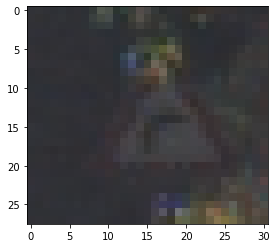

In [11]:
img = Image.open('Train/20/00020_00000_00006.png')
plt.imshow(img)

In [12]:
l = len(df['ClassId'])

In [13]:
df['ClassId'] = df['ClassId'].astype(str)
dftest['ClassId'] = dftest['ClassId'].astype(str)
for i in range(0, len(df['ClassId'])):
    if len(df['ClassId'][i]) == 1:
        df['ClassId'][i] = '0' + df['ClassId'][i]
for i in range(0, len(dftest['ClassId'])):
    if len(dftest['ClassId'][i]) == 1:
        dftest['ClassId'][i] = '0' + df['ClassId'][i]


<ipython-input-13-1bad6187d52a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ClassId'][i] = '0' + df['ClassId'][i]
<ipython-input-13-1bad6187d52a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest['ClassId'][i] = '0' + df['ClassId'][i]


In [14]:
print(df['ClassId'][10], df['Path'][10])

20 Train/20/00020_00000_00010.png


In [39]:
import keras 
from matplotlib import pyplot as plt

## Data preproccesing for our model

In [16]:
gen_train = keras.preprocessing.image.ImageDataGenerator(rescale=1./128,shear_range=0.2)
gen_test = keras.preprocessing.image.ImageDataGenerator(rescale=1./128)
generator_train = gen_train.flow_from_dataframe(dataframe=df,
                                                #directory='Traffic_Ligth_dataset',
                                                target_size=(128, 128),
                                                x_col='Path',
                                                y_col='ClassId',
                                                batch_size=32,
                                                class_mode='categorical'
                                                )

Found 39209 validated image filenames belonging to 43 classes.


In [17]:
generator_test = gen_test.flow_from_dataframe(dataframe=dftest,
                                            #directory='../input/gtsrb-german-traffic-sign/',
                                            x_col='Path',
                                            y_col='ClassId',
                                            target_size=(128, 128),
                                            batch_size=16,
                                            class_mode='categorical'
                                            )

Found 12630 validated image filenames belonging to 43 classes.


In [18]:
print("_"*100)

____________________________________________________________________________________________________


In [40]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping 
%matplotlib inline

## Let's train our Conv-Net 

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, pooling, AveragePooling2D, MaxPooling2D, Dropout
#create model
model = Sequential()
#add model layers
model.add(Conv2D(10, kernel_size=3, activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D())
model.add(Dropout(0.25))
model.add(Conv2D(15, kernel_size=3, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.5)) 
model.add(Conv2D(20, kernel_size=3, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(25, kernel_size=3, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.6))
model.add(Flatten())
model.add(Dense(43, activation='softmax'))
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 126, 126, 10)      280       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 63, 63, 10)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 63, 63, 10)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 61, 61, 15)        1365      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 30, 30, 15)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 30, 30, 15)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 20)       

In [29]:
history = model.fit(generator_train,epochs=5,batch_size=128,verbose=1)

Epoch 1/5
1226/1226 [==============================] - 1699s 1s/step - loss: 1.8026 - accuracy: 0.4645
Epoch 2/5
1226/1226 [==============================] - 825s 672ms/step - loss: 0.6595 - accuracy: 0.7894
Epoch 3/5
1226/1226 [==============================] - 791s 645ms/step - loss: 0.4340 - accuracy: 0.8596
Epoch 4/5
1226/1226 [==============================] - 793s 647ms/step - loss: 0.3413 - accuracy: 0.8923
Epoch 5/5
1226/1226 [==============================] - 557s 454ms/step - loss: 0.2938 - accuracy: 0.9056


### 90% accuracy on training our model

<AxesSubplot:>

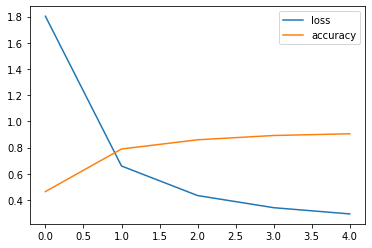

In [30]:
losses = pd.DataFrame(model.history.history)
losses
losses.plot()


In [31]:
model.evaluate(generator_test)

790/790 [==============================] - 266s 336ms/step - loss: 3.7055 - accuracy: 0.6257


[3.7055258750915527, 0.6257323622703552]

In [77]:
print("_"*100)

____________________________________________________________________________________________________


# So we have trained our model on traffic signs and seen it's output